In [1]:
import sys
sys.path.append("../")

##### import library

In [2]:
# Standard libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

# 3D plotting
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib.colors import Normalize, LinearSegmentedColormap

# Machine learning and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

# Deep learning (PyTorch and TensorFlow)
import torch
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2

# Plotly for interactive visualization
import plotly.graph_objects as go

# Custom utility module
import utility


2025-04-14 17:26:48.730239: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 17:26:48.779394: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-14 17:26:48.779434: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-14 17:26:48.780777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 17:26:48.788598: I tensorflow/core/platform/cpu_feature_guar

##### Define functions 

In [3]:
import numpy as np

def ackley_function_3D(args):
    x, y = args
    a = 30     # increase depth
    b = 1.0    # steepen the well
    c = 6 * np.pi  # increase oscillation frequency
    sum_sq_term = -a * np.exp(-b * np.sqrt(0.5 * (x**2 + y**2)))
    cos_term = -np.exp(0.5 * (np.cos(c * x) + np.cos(c * y)))

    return sum_sq_term + cos_term + a + np.exp(1.0)

f = ackley_function_3D


##### Define the fitness function for PyGAD

In [4]:
def fitness_func(ga_instance, solution, solution_idx):
    return -ackley_function_3D(solution)

##### Define the function in PyTorch


In [5]:
import torch

def ackley_function_3D_torch(args):
    x, y = args
    a = 30     # increase depth
    b = 1.0    # steepen the well
    c = 6 * np.pi  # increase oscillation frequency

    sum_sq_term = -a * torch.exp(-b * torch.sqrt(0.5 * (x**2 + y**2)))
    cos_term = -torch.exp(0.5 * (torch.cos(c * x) + torch.cos(c * y)))

    return sum_sq_term + cos_term + a + torch.exp(torch.tensor(1.0))


##### Plot graph

In [6]:
def plot_graph(fig, x, y, z):

    # 3D Surface Plot
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    surf = ax1.plot_surface(x, y, z, cmap=cmap, edgecolor="none")
    ax1.set_title("3D Surface Plot", fontsize=10)
    ax1.set_xlabel("X-axis", fontsize=10)
    ax1.set_ylabel("Y-axis", fontsize=10)
    # ax1.set_zlabel("Function Value", fontsize=5)

    # Add colorbar for 3D plot
    cbar1 = fig.colorbar(surf, ax=ax1, fraction=0.046, pad=0.04)
    cbar1.set_label("Function Value", fontsize=10)

    # # 2D Contour Plot
    # ax2 = fig.add_subplot(1, 2, 2)
    # contour = ax2.contourf(x, y, z, levels=50, cmap=cmap)
    # ax2.set_xlabel("X-axis", fontsize=10)
    # ax2.set_ylabel("Y-axis", fontsize=10)
    # ax2.set_title("2D Contour Plot", fontsize=10)

    # # Add colorbar for 2D plot without overlapping
    # cbar2 = fig.colorbar(contour, ax=ax2, fraction=0.046, pad=0.04)
    # cbar2.set_label("Function Value", fontsize=10)

    ax1.tick_params(axis='x', labelsize=10, rotation=0)
    ax1.tick_params(axis='y', labelsize=10)
    ax1.tick_params(axis='both', which='both', width=0.5)

    # Improve layout to avoid overlap
    plt.tight_layout()
    # plt.show()

    return fig, ax1



##### Initialize class object and grid

In [7]:
obj = utility.CentralDifference()
# Create a grid of x and y values
interval = 1000
max_iters = 1000
min_grid = -1.1
max_grid = 1.1
x = np.linspace(min_grid, max_grid, interval)
y = np.linspace(min_grid, max_grid, interval)
x, y = np.meshgrid(x, y)
z = f((x, y))

##### Define colormap

In [8]:
colors = [
    (0.0, "navy"),         # Deep blue for the minimum
    (0.01, "blue"),         # Blue
    (0.2, "cyan"),         # Cyan
    (0.4, "limegreen"),    # Green
    (0.6, "yellow"),       # Yellow
    (0.8, "orange"),       # Orange
    (1.0, "darkred"),      # Deep red for the maximum
]
cmap = LinearSegmentedColormap.from_list("improved_gradient_cmap", colors)

# obj.show_2D_surface_plot(x, y, z,  title = "Custom function", cmap = cmap)

##### Show 3D visualization

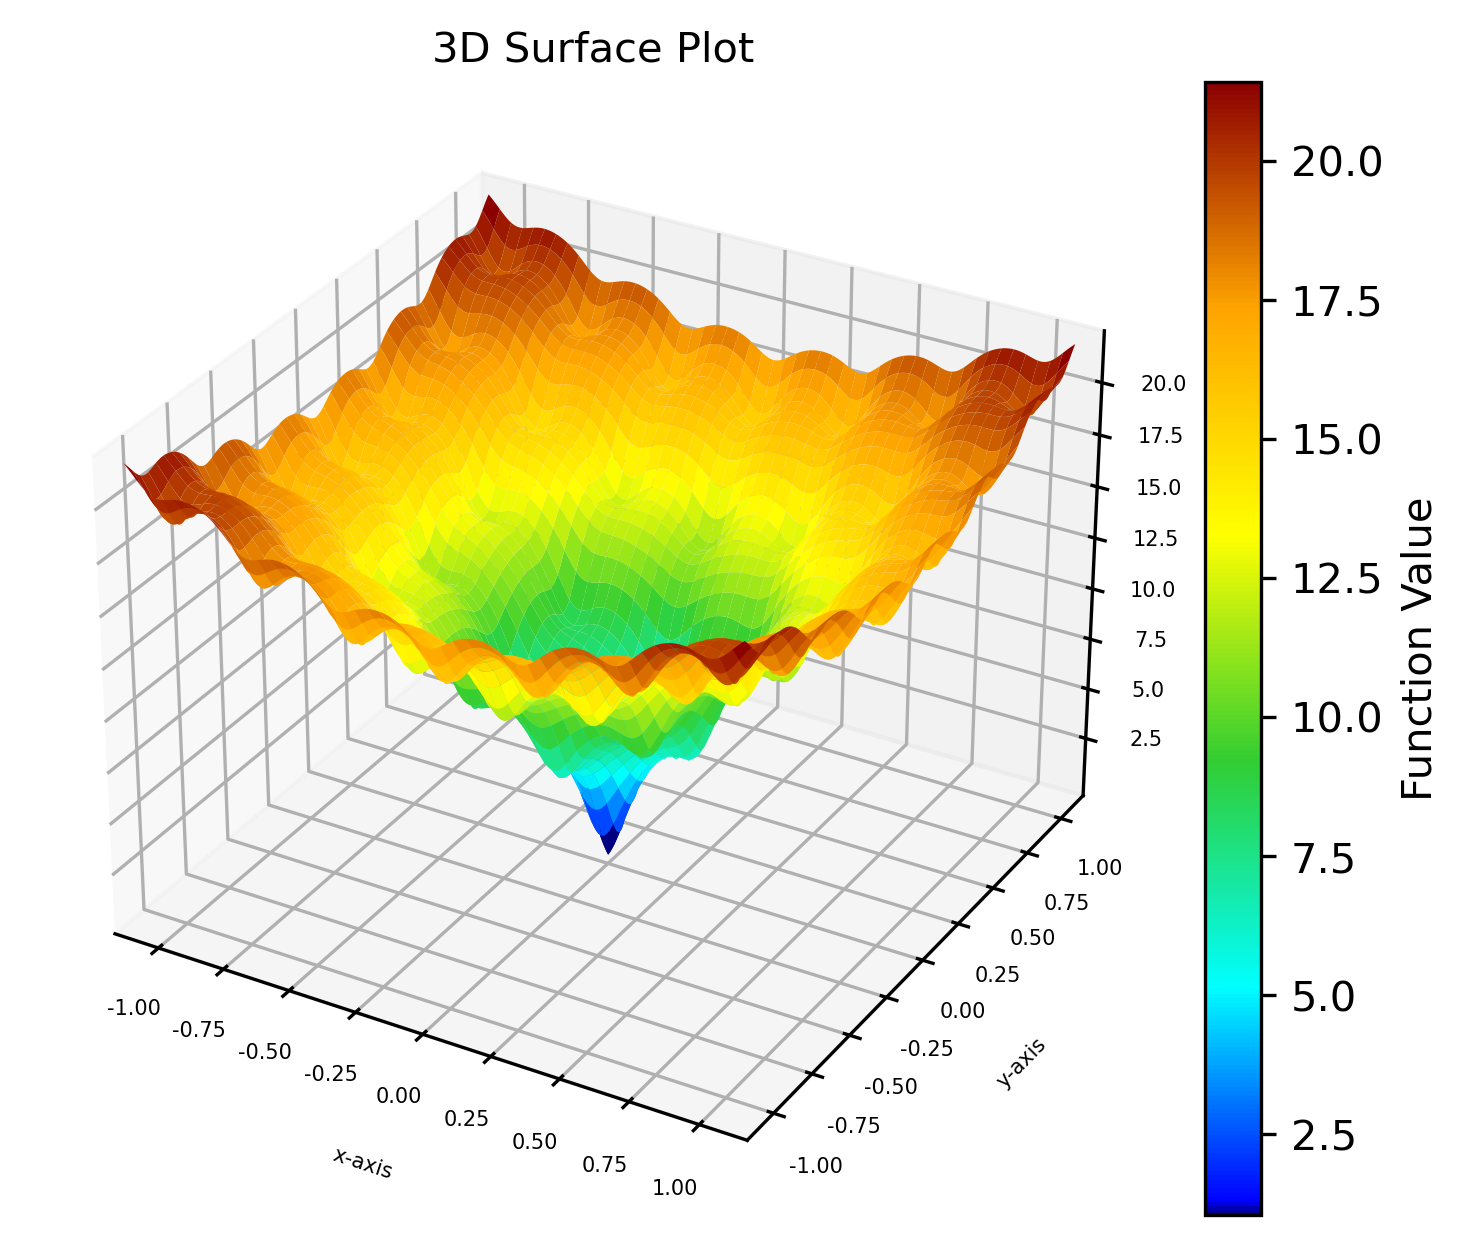

In [105]:
fig = plt.figure(figsize=(5, 5), dpi=300)
fig, ax1 = plot_graph(fig, x, y, z)

ax1.set_ylabel("y-axis", labelpad=1)
ax1.set_xlabel("x-axis", labelpad=1)
# ax1.set_title("3D surface plot", fontsize=10)
ax1 = utility.custom_figure_axis(ax=ax1, show_ticks = True, rotation =0, tick_fontsize = 5, label_fontsize = 5, legend_fontsize = 5)

# ax2.set_ylabel("y-axis", labelpad=1)
# ax2.set_xlabel("x-axis", labelpad=1)
# ax2.set_title("2D contour plot", fontsize=10)
# ax2 = utility.custom_figure_axis(ax=ax2, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)
ax1.grid()
plt.tight_layout()
plt.savefig("customized_ackley_plot.pdf", dpi = 300, bbox_inches="tight")


##### SHow a dummy example

In [11]:
args = [-0.16210637, -0.11185439]

grad = obj.compute_gradient(args = args, f = f)
print("Gradient:", grad)

Gradient: [-15.57086156 -14.28928876]


##### Define parametrs and variables

In [12]:
num_samples=10000
dimension=2
batch_size=512

##### Generate synthetic data to model the gradient of function with min and max grid

In [14]:
X_train, X_test, y_train, y_test = obj.generate_random_data(f=f, num_samples=num_samples, dimension=dimension, value_range=(min_grid,max_grid))

##### Define model architecture

In [18]:
model = Sequential([
    Dense(512, input_shape=(dimension,), activation='leaky_relu'),
    Dense(256, activation='leaky_relu', kernel_regularizer=l2(0.001)),
    Dense(128, activation='leaky_relu'),
    Dense(64, activation='leaky_relu'),
    Dense(32, activation='leaky_relu'),
    Dense(dimension)
])

model.compile(loss='mse', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))

epochs = 2000

history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)

Epoch 1/2000
13/13 [==============================] - 1s 24ms/step - loss: 142.9022 - val_loss: 118.0136
Epoch 2/2000
13/13 [==============================] - 0s 14ms/step - loss: 102.3950 - val_loss: 87.5277
Epoch 3/2000
13/13 [==============================] - 0s 15ms/step - loss: 88.3646 - val_loss: 82.6236
Epoch 4/2000
13/13 [==============================] - 0s 13ms/step - loss: 85.6633 - val_loss: 79.8084
Epoch 5/2000
13/13 [==============================] - 0s 15ms/step - loss: 83.5872 - val_loss: 78.5044
Epoch 6/2000
13/13 [==============================] - 0s 14ms/step - loss: 82.1935 - val_loss: 77.8351
Epoch 7/2000
13/13 [==============================] - 0s 14ms/step - loss: 81.4779 - val_loss: 76.5072
Epoch 8/2000
13/13 [==============================] - 0s 13ms/step - loss: 80.1462 - val_loss: 75.5810
Epoch 9/2000
13/13 [==============================] - 0s 13ms/step - loss: 79.1809 - val_loss: 75.0472
Epoch 10/2000
13/13 [==============================] - 0s 14ms/step - 

##### Define loss curve

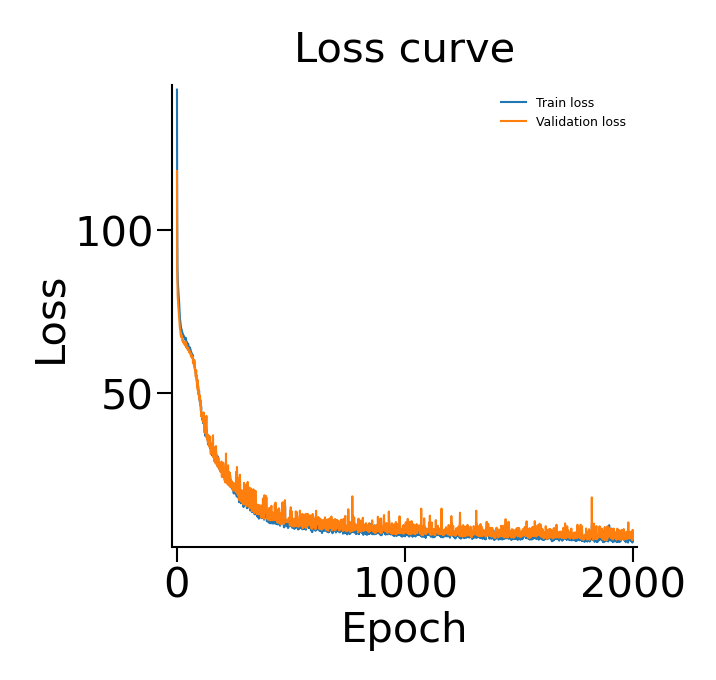

In [19]:
ax = obj.plot_convergence(history)
# ax = utility.custom_figure_axis(ax, fontsize=4, rotation = 0)
ax.set_ylabel("Loss", labelpad=1)
ax.set_xlabel("Epoch", labelpad=1)
ax.set_title("Loss curve", fontsize=10)

ax = utility.custom_figure_axis(ax, show_ticks = True, rotation =0, tick_fontsize = 10, label_fontsize = 10, legend_fontsize = 10)

plt.savefig("ackley.pdf", dpi = 300)

##### Test data performance

In [20]:
test_loss = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)

63/63 [==============================] - 0s 3ms/step - loss: 5.8524
Test loss: 5.852402687072754


##### Define torch optimizer

In [22]:
import numpy as np
import torch
import torch.optim as optim

def torch_optimization(args, lr, num_steps, f, tol=1e-5, patience=100):
    """
    Performs optimization using PyTorch's Adam optimizer with early stopping 
    when loss difference is below a threshold for a given number of epochs.

    Parameters:
    args (tuple): Initial values (x, y).
    lr (float): Learning rate.
    num_steps (int): Maximum number of optimization steps.
    f (function): Function to be minimized.
    tol (float): Threshold for stopping when loss difference is small.
    patience (int): Number of consecutive epochs with small loss change before stopping.

    Returns:
    np.array: Optimized values of (x, y).
    list: List of function values (loss) at each epoch.
    """

    x = torch.tensor(args[0], dtype=torch.float32, requires_grad=True)
    y = torch.tensor(args[1], dtype=torch.float32, requires_grad=True)

    optimizer = optim.Adam([x, y], lr=lr)

    function_values = []  # Store f(x, y) values at each epoch
    stable_count = 0  # Counter for consecutive small changes

    for step in range(num_steps):
        optimizer.zero_grad()
        
        loss = f((x, y))  # Compute function value
        function_values.append(loss.item())  # Store function value
        
        loss.backward()  # Compute gradients
        optimizer.step()  # Update parameters

        # Check for early stopping
        if step > 0:
            loss_diff = abs(function_values[-1] - function_values[-2])
            if loss_diff < tol:
                stable_count += 1
            else:
                stable_count = 0  # Reset if loss difference is significant

            if stable_count >= patience:
                print(f"Early stopping at step {step} (loss change < {tol} for {patience} consecutive epochs)")
                break

    return np.array([x.item(), y.item()]), function_values


In [23]:
max_iters = 10000
lr = 0.001


##### Store the result of Gradient Descent with central differentiation

In [55]:

c = 0

df_cd = pd.DataFrame(columns =["X_start",  "y_start", "X_gd_cd", "y_gd_cd"])

for i in np.arange(-1, 2, 1):
    for j in np.arange(-1, 2, 1):


        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])
        X_gd, y_gd, history_gd = obj.optimize_function_with_central_difference(f=f, x0=x0, learning_rate=lr, max_iters=max_iters, tol=1e-6, patience =200)
        df_cd.loc[c, ["X_gd_cd", "y_gd_cd"]] = X_gd, y_gd
        df_cd.loc[c, "y_start"] = f(x0)
        df_cd.loc[c, "X_start"] = x0


        c = c + 1

        X_gd, y_gd, x0 =  [None] * 3


currently running for x = -1 and y = -1
Early stopping at iteration 210 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = -1 and y = 0
Early stopping at iteration 212 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = -1 and y = 1
Early stopping at iteration 210 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 0 and y = -1
Early stopping at iteration 212 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 0 and y = 0
Early stopping at iteration 200 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 0 and y = 1
Early stopping at iteration 212 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 1 and y = -1
Early stopping at iteration 210 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 1 and y = 0
Early stopping at iteration 212 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 1 and y = 1
Early stoppi

##### store result for proposed method

In [53]:
c = 0

df_proposed = pd.DataFrame(columns =["X_start",  "y_start", "X_new", "y_new"])

for i in np.arange(-1, 2, 1):
    for j in np.arange(-1, 2, 1):

        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])
        X_new, y_new, history_proposed = obj.optimize_function(f=f, model = model, x0=x0, learning_rate=lr, max_iters=max_iters, tol=1e-6, patience =200)
        df_proposed.loc[c, ["X_new", "y_new"]] = X_new, y_new
        df_proposed.loc[c, "y_start"] = f(x0)
        df_proposed.loc[c, "X_start"] = x0

        c = c + 1

        X_new, y_new, x0 =  [None] * 3

    #     break
    # break


currently running for x = -1 and y = -1
Early stopping at iteration 230 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = -1 and y = 0
currently running for x = -1 and y = 1
Early stopping at iteration 255 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 0 and y = -1
Early stopping at iteration 231 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 0 and y = 0
currently running for x = 0 and y = 1
Early stopping at iteration 273 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 1 and y = -1
Early stopping at iteration 254 (loss change < 1e-06 for 200 consecutive steps)
currently running for x = 1 and y = 0
currently running for x = 1 and y = 1
Early stopping at iteration 239 (loss change < 1e-06 for 200 consecutive steps)


##### Store result for autograd

In [56]:
c = 0

df_autograd = pd.DataFrame(columns =["X_start",  "y_start", "X_autograd", "y_autograd"])

for i in np.arange(-1, 2, 1):
    for j in np.arange(-1, 2, 1):

        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])

        x_torch, history_autograd = torch_optimization(args=x0, lr = lr, num_steps=max_iters, f=ackley_function_3D_torch, patience =200, tol=1e-6)

        df_autograd.loc[c, "y_start"] = f(x0)
        df_autograd.loc[c, "X_start"] = x0

        df_autograd.loc[c, "X_autograd"] = x_torch
        df_autograd.loc[c, "y_autograd"] = f(x_torch)

        x_torch, x0 = [None] *2


        c = c + 1

    #     break
    # break


currently running for x = -1 and y = -1
Early stopping at step 291 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = -1 and y = 0
Early stopping at step 435 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = -1 and y = 1
Early stopping at step 291 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = 0 and y = -1
Early stopping at step 435 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = 0 and y = 0
currently running for x = 0 and y = 1
Early stopping at step 435 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = 1 and y = -1
Early stopping at step 291 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = 1 and y = 0
Early stopping at step 435 (loss change < 1e-06 for 200 consecutive epochs)
currently running for x = 1 and y = 1
Early stopping at step 291 (loss change < 1e-06 for 200 consecutive epochs)


##### Store result for Genetic Algorithm

In [57]:
import pygad

c = 0

df_ga = pd.DataFrame(columns =["X_start",  "y_start", "X_ga", "y_ga"])


for i in np.arange(-1, 2, 1):
    for j in np.arange(-1, 2, 1):



        print(f"currently running for x = {i} and y = {j}")
        x0 = np.array([i*1.0, j*1.0])

        initial_population = np.array([
            x0 + np.random.uniform(-0.5, 0.5, size=2) for _ in range(10)
        ])

        ga_instance = pygad.GA(
            initial_population=initial_population,
            num_generations=50,
            num_parents_mating=5,
            fitness_func=fitness_func,
            mutation_type="random",
            mutation_num_genes=1,         
            crossover_type="single_point", 
            keep_parents=2,                
            stop_criteria=["saturate_10"]  
        )

        ga_instance.run()

        solution, solution_fitness, _ = ga_instance.best_solution()
        best_value = -solution_fitness


        df_ga.loc[c, "y_start"] = f(x0)
        df_ga.loc[c, "X_start"] = x0

        df_ga.loc[c, "X_ga"] = solution
        df_ga.loc[c, "y_ga"] = best_value
        solution, x0 = [None] *2


        c = c + 1

        # break
    # break


currently running for x = -1 and y = -1
currently running for x = -1 and y = 0
currently running for x = -1 and y = 1
currently running for x = 0 and y = -1
currently running for x = 0 and y = 0
currently running for x = 0 and y = 1
currently running for x = 1 and y = -1
currently running for x = 1 and y = 0
currently running for x = 1 and y = 1


In [58]:
df_autograd["y_start"] = df_autograd["y_start"].apply(pd.to_numeric, errors='coerce')
df_autograd["X_start"] = df_autograd["X_start"].astype(str)

df_proposed["y_start"] = df_proposed["y_start"].apply(pd.to_numeric, errors='coerce')
df_proposed["X_start"] = df_proposed["X_start"].astype(str)

df_cd["y_start"] = df_cd["y_start"].apply(pd.to_numeric, errors='coerce')
df_cd["X_start"] = df_cd["X_start"].astype(str)

df_ga["y_start"] = df_ga["y_start"].apply(pd.to_numeric, errors='coerce')
df_ga["X_start"] = df_ga["X_start"].astype(str)

df = pd.merge(df_autograd, df_proposed).merge(df_cd).merge(df_ga)
df["y_autograd"] = df["y_autograd"].apply(pd.to_numeric, errors='coerce')
df["y_gd_cd"] = df["y_gd_cd"].apply(pd.to_numeric, errors='coerce')
df["y_ga"] = df["y_ga"].apply(pd.to_numeric, errors='coerce')

In [59]:
df

,X_start,y_start,X_autograd,y_autograd,X_new,y_new,X_gd_cd,y_gd_cd,X_ga,y_ga
0,[-1. -1.],1.896362e+01,"[-0.9880380034446716, -0.9880380034446716]",18.898750,"[-0.9730614731280642, -0.9797062102360243]",18.956713,"[-0.9880379796557861, -0.9880379796557861]",1.889875e+01,"[0.040991542159582006, 0.03447689556287348]",1.703309
1,[-1. 0.],1.520794e+01,"[-0.9760293960571289, 0.0]",15.088108,"[0.005901982228000015, 0.0007858629632536696]",0.134576,"[-0.9760294227272084, 0.0]",1.508811e+01,"[0.002410251336341984, 0.011399866888405774]",0.278623
2,[-1. 1.],1.896362e+01,"[-0.9880380034446716, 0.9880380034446716]",18.898750,"[-0.9616521854107205, 0.9581027989916073]",19.161286,"[-0.9880379796557861, 0.9880379796557861]",1.889875e+01,"[-0.041093667796642586, 0.0052196025094769505]",1.233052
3,[ 0. -1.],1.520794e+01,"[0.0, -0.9760293960571289]",15.088108,"[-0.0022239806543860874, -0.9608936851156038]",15.12517,"[0.0, -0.9760294227272084]",1.508811e+01,"[-0.003171689607077255, 0.02790772716760992]",0.769899
4,[0. 0.],-3.108624e-15,"[nan, nan]",NaN,"[0.0059019073934760205, 0.0007858608637516754]",0.134576,"[0.0, 0.0]",-3.108624e-15,"[-0.00574990858102542, 0.1011819469491716]",3.399158
5,[0. 1.],1.520794e+01,"[0.0, 0.9760293960571289]",15.088108,"[0.005805989911992375, 0.9417175437930578]",15.240514,"[0.0, 0.9760294227272084]",1.508811e+01,"[-0.07225739199344083, 0.0324690317935441]",2.682450
6,[ 1. -1.],1.896362e+01,"[0.9880380034446716, -0.9880380034446716]",18.898750,"[0.9667498485610719, -0.9697915746038479]",19.041781,"[0.9880379796557861, -0.9880379796557861]",1.889875e+01,"[-0.03247206656710333, -0.01239869749935485]",0.997751
7,[1. 0.],1.520794e+01,"[0.9760293960571289, 0.0]",15.088108,"[0.00590193952384923, 0.0007858597123741561]",0.134576,"[0.9760294227272084, 0.0]",1.508811e+01,"[0.028301783000495906, 0.05770101367032421]",2.110862
8,[1. 1.],1.896362e+01,"[0.9880380034446716, 0.9880380034446716]",18.898750,"[0.9764867377501831, 0.9832895515169007]",18.930613,"[0.9880379796557861, 0.9880379796557861]",1.889875e+01,"[0.03112425370163152, 0.08035794470112811]",2.932162


In [109]:
# Round to 3 decimal places
df['y_start'] = df['y_start'].round(3)
df['y_autograd'] = df['y_autograd'].round(3)
df['y_new'] = df['y_new'].round(3)
df['y_gd_cd'] = df['y_gd_cd'].round(3)
df['y_ga'] = df['y_ga'].round(3)

In [111]:
df

,X_start,y_start,X_autograd,y_autograd,X_new,y_new,X_gd_cd,y_gd_cd,X_ga,y_ga
0,[-1. -1.],18.964,"[-0.9880380034446716, -0.9880380034446716]",18.899,"[-0.9730614731280642, -0.9797062102360243]",18.956713,"[-0.9880379796557861, -0.9880379796557861]",18.899,"[0.040991542159582006, 0.03447689556287348]",1.703
1,[-1. 0.],15.208,"[-0.9760293960571289, 0.0]",15.088,"[0.005901982228000015, 0.0007858629632536696]",0.134576,"[-0.9760294227272084, 0.0]",15.088,"[0.002410251336341984, 0.011399866888405774]",0.279
2,[-1. 1.],18.964,"[-0.9880380034446716, 0.9880380034446716]",18.899,"[-0.9616521854107205, 0.9581027989916073]",19.161286,"[-0.9880379796557861, 0.9880379796557861]",18.899,"[-0.041093667796642586, 0.0052196025094769505]",1.233
3,[ 0. -1.],15.208,"[0.0, -0.9760293960571289]",15.088,"[-0.0022239806543860874, -0.9608936851156038]",15.12517,"[0.0, -0.9760294227272084]",15.088,"[-0.003171689607077255, 0.02790772716760992]",0.770
4,[0. 0.],-0.000,"[nan, nan]",NaN,"[0.0059019073934760205, 0.0007858608637516754]",0.134576,"[0.0, 0.0]",-0.000,"[-0.00574990858102542, 0.1011819469491716]",3.399
5,[0. 1.],15.208,"[0.0, 0.9760293960571289]",15.088,"[0.005805989911992375, 0.9417175437930578]",15.240514,"[0.0, 0.9760294227272084]",15.088,"[-0.07225739199344083, 0.0324690317935441]",2.682
6,[ 1. -1.],18.964,"[0.9880380034446716, -0.9880380034446716]",18.899,"[0.9667498485610719, -0.9697915746038479]",19.041781,"[0.9880379796557861, -0.9880379796557861]",18.899,"[-0.03247206656710333, -0.01239869749935485]",0.998
7,[1. 0.],15.208,"[0.9760293960571289, 0.0]",15.088,"[0.00590193952384923, 0.0007858597123741561]",0.134576,"[0.9760294227272084, 0.0]",15.088,"[0.028301783000495906, 0.05770101367032421]",2.111
8,[1. 1.],18.964,"[0.9880380034446716, 0.9880380034446716]",18.899,"[0.9764867377501831, 0.9832895515169007]",18.930613,"[0.9880379796557861, 0.9880379796557861]",18.899,"[0.03112425370163152, 0.08035794470112811]",2.932


##### Convert the data to long format

In [82]:
long_df = pd.melt(
    df,
    id_vars=["X_start", "y_start"],               
    value_vars=["y_autograd", "y_new", "y_gd_cd", "y_ga"],  
    var_name="type",                                
    value_name="value"                             
)

long_df["X_start"] = long_df["X_start"].astype(str)

In [84]:
# long_df

##### Plot of Suboptimality Gap across method

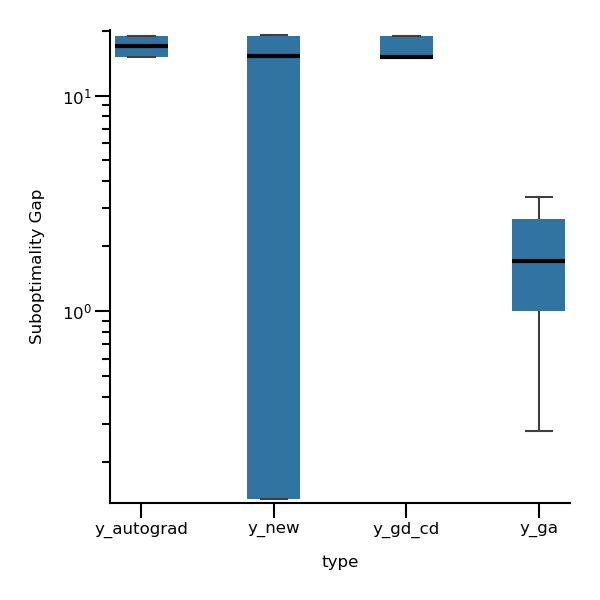

In [104]:
import seaborn as sns
fig, ax = plt.subplots(1,1, dpi = 300, figsize=(2.1,2.1))
ax = sns.boxplot(long_df, x = "type", y = "value",ax=ax, linewidth=0.5, boxprops=dict(edgecolor="black", linewidth=0), flierprops=dict(marker='o', markeredgecolor='black'), width=0.4, fliersize=0.15, dodge=True, medianprops={"color": "black","linewidth":1})
ax.set_yscale("log")
ax = utility.custom_figure_axis(ax=ax, show_ticks = True, rotation =0, tick_fontsize = 4, label_fontsize = 4, legend_fontsize = 4)
ax.set_ylabel("Suboptimality Gap")
plt.tight_layout()
plt.savefig("ackley_customized_box.pdf", dpi = 300)

In [87]:
print("The mean Suboptimality gap with Autograd is ", df["y_autograd"].mean())
print("The mean Suboptimality gap with Gradient Descent is ", df["y_gd_cd"].mean())
print("The mean Suboptimality gap with genetic algorithm is ", df["y_ga"].mean())
print("The mean Suboptimality gap with PNGA is ", df["y_new"].mean())
print("The std of Suboptimality gap with Autograd is ", df["y_autograd"].std())
print("The std of Suboptimality gap with Gradient Descent is ", df["y_gd_cd"].std())
print("The std of Suboptimality gap with genetic algorithm is ", df["y_ga"].std())
print("The std of Suboptimality gap with PNGA is ", df["y_new"].std())

The mean Suboptimality gap with Autograd is  16.993429362999066
The mean Suboptimality gap with Gradient Descent is  15.105270544887894
The mean Suboptimality gap with genetic algorithm is  1.7896961383191987
The mean Suboptimality gap with PNGA is  11.873311812392267
The std of Suboptimality gap with Autograd is  2.036873864991126
The std of Suboptimality gap with Gradient Descent is  5.976331797251615
The std of Suboptimality gap with genetic algorithm is  1.0643995701070892
The std of Suboptimality gap with PNGA is  8.94279018440673


##### Show result

In [67]:
# Load the saved model
model.save("ackley_customized.keras")
loaded_model = load_model("ackley_customized.keras") 
test_loss = loaded_model.evaluate(X_test, y_test)
print("Test loss:", loaded_model.evaluate(X_test, y_test))

63/63 [==============================] - 0s 3ms/step - loss: 5.8524
Test loss: 5.852402687072754


#### pickle result

In [88]:
res = {"model": model, "history": history, "result": df}

# Save (pickle) the dictionary to a file
with open("ackley_customized.pkl", "wb") as file:
    pickle.dump(res, file)

In [89]:
# Load (unpickle) the dictionary from the file
with open("ackley_customized.pkl", "rb") as file:
    loaded_data = pickle.load(file)

# print(loaded_data)


##### Test if pickled model is working

In [90]:
loaded_model1 = loaded_data["model"]
# test_loss = loaded_model.evaluate(X_test, y_test)
print("Test loss:", loaded_model1.evaluate(X_test, y_test))

63/63 [==============================] - 0s 2ms/step - loss: 5.8524
Test loss: 5.852402687072754


In [97]:
df

,X_start,y_start,X_autograd,y_autograd,X_new,y_new,X_gd_cd,y_gd_cd,X_ga,y_ga
0,[-1. -1.],1.896362e+01,"[-0.9880380034446716, -0.9880380034446716]",18.898750,"[-0.9730614731280642, -0.9797062102360243]",18.956713,"[-0.9880379796557861, -0.9880379796557861]",1.889875e+01,"[0.040991542159582006, 0.03447689556287348]",1.703309
1,[-1. 0.],1.520794e+01,"[-0.9760293960571289, 0.0]",15.088108,"[0.005901982228000015, 0.0007858629632536696]",0.134576,"[-0.9760294227272084, 0.0]",1.508811e+01,"[0.002410251336341984, 0.011399866888405774]",0.278623
2,[-1. 1.],1.896362e+01,"[-0.9880380034446716, 0.9880380034446716]",18.898750,"[-0.9616521854107205, 0.9581027989916073]",19.161286,"[-0.9880379796557861, 0.9880379796557861]",1.889875e+01,"[-0.041093667796642586, 0.0052196025094769505]",1.233052
3,[ 0. -1.],1.520794e+01,"[0.0, -0.9760293960571289]",15.088108,"[-0.0022239806543860874, -0.9608936851156038]",15.12517,"[0.0, -0.9760294227272084]",1.508811e+01,"[-0.003171689607077255, 0.02790772716760992]",0.769899
4,[0. 0.],-3.108624e-15,"[nan, nan]",NaN,"[0.0059019073934760205, 0.0007858608637516754]",0.134576,"[0.0, 0.0]",-3.108624e-15,"[-0.00574990858102542, 0.1011819469491716]",3.399158
5,[0. 1.],1.520794e+01,"[0.0, 0.9760293960571289]",15.088108,"[0.005805989911992375, 0.9417175437930578]",15.240514,"[0.0, 0.9760294227272084]",1.508811e+01,"[-0.07225739199344083, 0.0324690317935441]",2.682450
6,[ 1. -1.],1.896362e+01,"[0.9880380034446716, -0.9880380034446716]",18.898750,"[0.9667498485610719, -0.9697915746038479]",19.041781,"[0.9880379796557861, -0.9880379796557861]",1.889875e+01,"[-0.03247206656710333, -0.01239869749935485]",0.997751
7,[1. 0.],1.520794e+01,"[0.9760293960571289, 0.0]",15.088108,"[0.00590193952384923, 0.0007858597123741561]",0.134576,"[0.9760294227272084, 0.0]",1.508811e+01,"[0.028301783000495906, 0.05770101367032421]",2.110862
8,[1. 1.],1.896362e+01,"[0.9880380034446716, 0.9880380034446716]",18.898750,"[0.9764867377501831, 0.9832895515169007]",18.930613,"[0.9880379796557861, 0.9880379796557861]",1.889875e+01,"[0.03112425370163152, 0.08035794470112811]",2.932162


In [112]:
df.to_csv("ackley_customized.csv", index=False)